In [33]:
# create our machine learning models

import pandas as pd
import numpy as np
import sklearn as sk

print('pandas ', pd.__version__)
print('numpy ', np.__version__)
print('sklearn', sk.__version__)

pandas  1.1.3
numpy  1.19.2
sklearn 0.23.2


In [34]:
data = pd.read_csv('data/data.csv')
data.shape

(2460, 23)

In [35]:
y = data['Attrition']
print(y)
print(type(y))

0       1
1       0
2       1
3       0
4       0
       ..
2455    1
2456    1
2457    1
2458    1
2459    1
Name: Attrition, Length: 2460, dtype: int64
<class 'pandas.core.series.Series'>


In [36]:
X = data.drop(columns =['Attrition'])
print(X)
print(type(y))

             0         1         2         3         4         5         6  \
0     0.446350  0.742527 -1.010909 -1.701283 -0.660531  0.379672 -0.057788   
1     1.322365 -1.297775 -0.147150 -1.699621  0.254625 -1.026167 -0.057788   
2     0.008343  1.414363 -0.887515 -1.696298  1.169781 -1.026167 -0.961486   
3    -0.429664  1.461466 -0.764121 -1.694636  1.169781  0.379672 -0.961486   
4    -1.086676 -0.524295 -0.887515 -1.691313 -1.575686  0.379672 -0.961486   
...        ...       ...       ...       ...       ...       ...       ...   
2455  2.307882 -0.613910 -0.360932  0.426633  0.388697 -0.820208  1.110699   
2456  0.924978 -0.034119  1.875718 -0.416432 -0.362365  1.785511 -0.352220   
2457 -0.652277 -1.233916  2.437351 -1.119200  0.254625 -1.026167 -0.961486   
2458 -0.601999  0.387925 -0.312360  1.408507 -1.575686 -0.757273 -0.596062   
2459 -0.916106 -1.630878  0.415242  0.759076 -1.575686  0.224215 -0.157718   

             7         8         9  ...        12        13    

In [37]:
# convert X and y to numpy arrays

y = np.asarray(y)
X = np.asarray(X)
print(y)
print(type(y))
print(y.shape)

print(X)
print(type(X))
print(X.shape)

[1 0 1 ... 1 1 1]
<class 'numpy.ndarray'>
(2460,)
[[ 0.4463504   0.74252653 -1.01090934 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -1.2977746  -0.14714972 ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    1.41436324 -0.88751511 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-0.65227716 -1.2339159   2.43735093 ... -0.06936247 -0.37212576
  -0.03759979]
 [-0.60199925  0.38792512 -0.31236032 ... -0.61549158 -0.05828489
  -0.59522723]
 [-0.91610649 -1.63087836  0.41524191 ... -0.36992452 -0.61049116
  -1.09393191]]
<class 'numpy.ndarray'>
(2460, 22)


In [72]:
from sklearn.model_selection import train_test_split

random_seed = 30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=random_seed)

numerator = y_train[y_train == 1].sum()
denominator = len(y_train)
print("\n", numerator/denominator * 100, " percent of training data is in class 1")
print('len y_train: ', len(y_train))
print('len y_test: ', len(y_test))


 49.83261597321856  percent of training data is in class 1
len y_train:  2091
len y_test:  369


# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train logistic regression model (with default regularization) for binary classification
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_knn = knn_model.predict(X_test)
knn_test_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print('\nTest accuracy: '+str(knn_test_accuracy))


Test accuracy: 0.907859078590786


# Decision Tree

In [51]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=6, 
                              random_state=2)
tree.fit(X_train, y_train)


y_pred_tree = tree.predict(X_test)
tree_test_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
print("Test accuracy: "+str(tree_test_accuracy))

Test accuracy: 0.8672086720867209


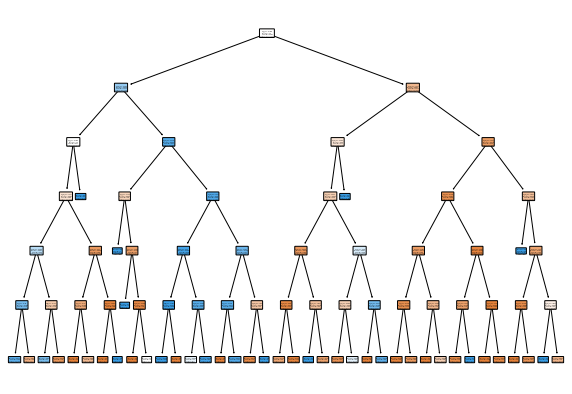

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Yes', 
                       'No']) 

plt.show()

# SVM

In [59]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

svm_test_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy:",svm_test_accuracy)

Accuracy: 0.926829268292683


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='l2', random_state=0, solver='liblinear')
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

lr_test_accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", lr_test_accuracy)

Accuracy:  0.7940379403794038


# Neural Network

In [71]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu')
mlp_model.fit(X_test, y_test)

y_pred_mlp = mlp_model.predict(X_test)

mlp_test_accuracy = metrics.accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", mlp_test_accuracy)

Accuracy:  1.0
